<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

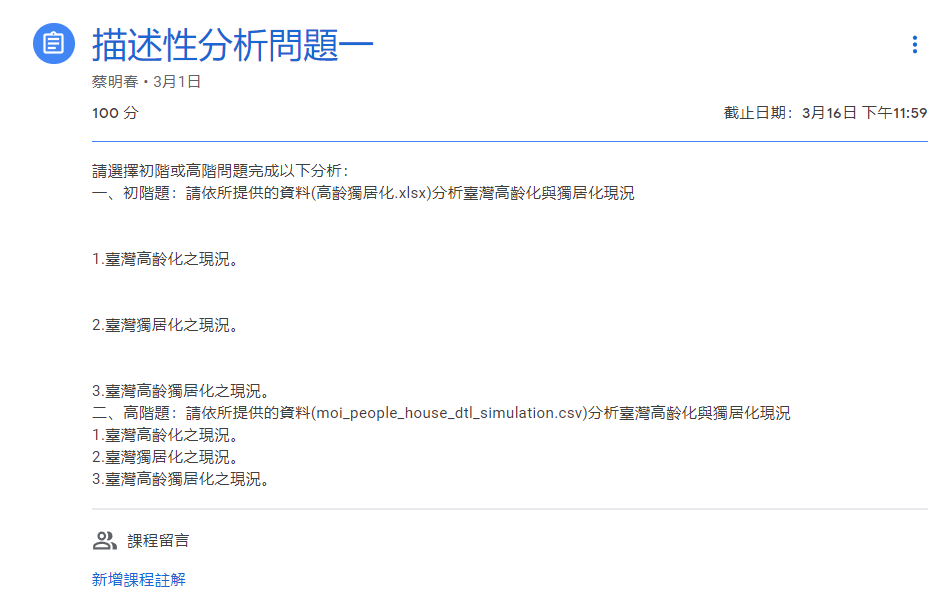

In [105]:
!pip install geopandas

In [104]:
!pip install geoplot

In [101]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

In [4]:
import geopandas as gpd
# import shapely
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import patches as mpatches

In [94]:
df = pd.read_csv('/content/drive/MyDrive/大學/高齡獨居化計畫.csv')

# df['older_precent'] = df['Total_older'] / df['total_city_people'] *100 
# df['lonely_precent'] = df['total_lonely'] / df['total_city_people'] *100 
# df['older_lonely_precent'] = df['total_old_and_lonely'] / df['total_city_people'] *100 


plt.rcParams['figure.figsize']=(10,10)

#匯入地圖套件
town_TA = gpd.read_file('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/台灣地圖/TOWN_MOI_1081121.shp', encoding='utf-8')


#匯入地區區碼
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)

#區碼 跟 資料合併
df = df.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))


# #資料 跟 經緯度合併
town_A_no = town_TA.merge(df, left_on=('TOWNNAME'), right_on=('TOWNNAME'))
city_A_no = pd.DataFrame(town_A_no.groupby('COUNTYNAME').sum()['Total_older'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people'],columns=['older_precent'])
city_A_no['lonely_precent'] = town_A_no.groupby('COUNTYNAME').sum()['total_lonely'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people']
city_A_no['older_lonely_precent'] = town_A_no.groupby('COUNTYNAME').sum()['total_old_and_lonely'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people']
town_A_no = town_A_no.merge(city_A_no, left_on=('COUNTYNAME'), right_on=('COUNTYNAME'))
town_A_no.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,addr_city_cd,Total_older,...,total_old_and_have_child,total_child_is_same_county,total_old_and_child_is_same_county,total_mate,total_old_and_mate,total_city_people,戶籍鄉鎮市區,older_precent,lonely_precent,older_lonely_precent
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",10014020,2790,...,2703,5906,2169,5633,1585,13842,10014020,0.164779,0.139813,0.039632
1,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",10014110,464,...,451,1864,422,1830,297,4080,10014110,0.164779,0.139813,0.039632
2,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",10014160,386,...,350,2023,333,2000,177,5153,10014160,0.164779,0.139813,0.039632
3,V09,10014050,臺東縣,鹿野鄉,Luye Township,V,10014,"POLYGON ((121.19419 22.93667, 121.19392 22.936...",10014050,1614,...,1550,3431,1243,3212,863,7736,10014050,0.164779,0.139813,0.039632
4,V10,10014060,臺東縣,池上鄉,Chishang Township,V,10014,"POLYGON ((121.21208 23.14418, 121.21230 23.144...",10014060,1754,...,1673,3579,1371,3288,932,8153,10014060,0.164779,0.139813,0.039632


# 第一題



## 1.高齡


Text(0.5, 1.0, '臺灣高齡化之現況')

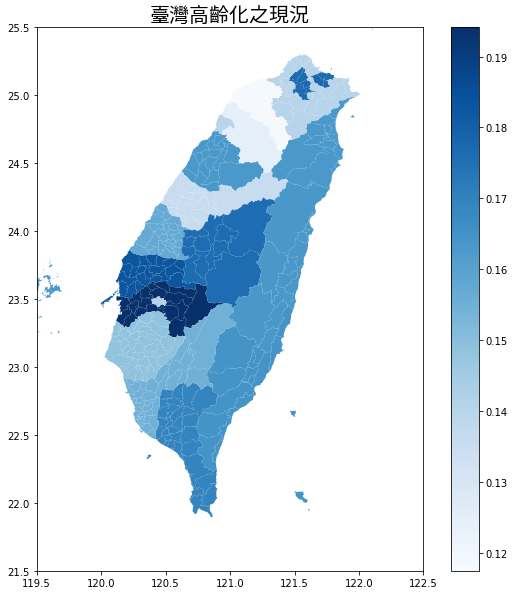

In [89]:
SA=town_A_no.plot(column='older_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況')

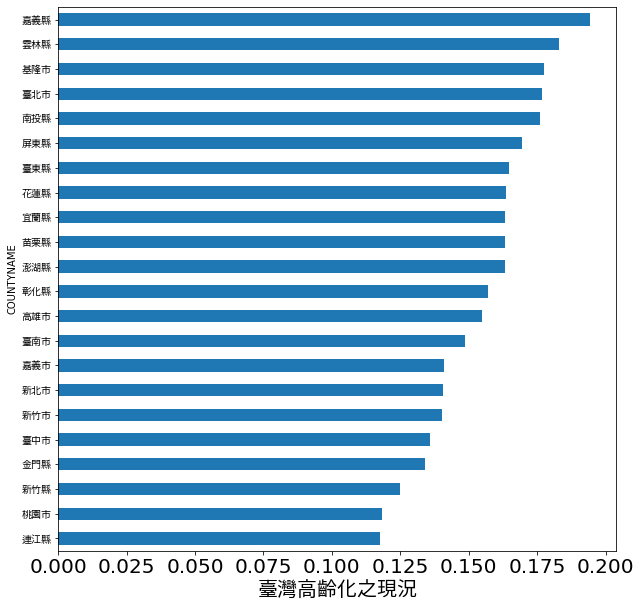

In [96]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('older_precent')['older_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況',fontproperties=myfont,fontsize=20)

## 2.獨居


Text(0.5, 1.0, '臺灣獨居化之現況')

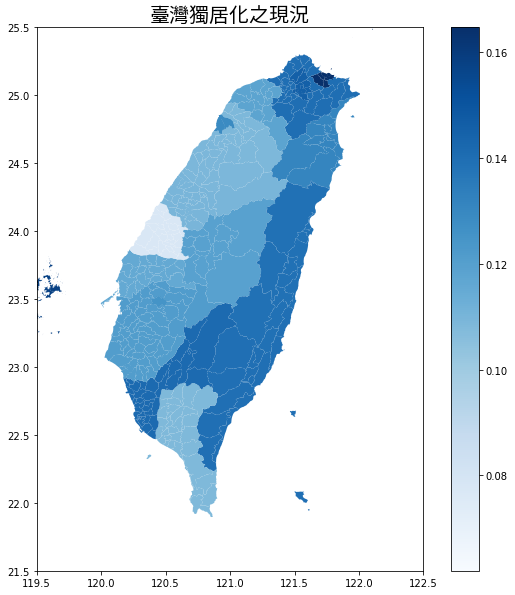

In [97]:
SA=town_A_no.plot(column='lonely_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣獨居化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣獨居化之現況')

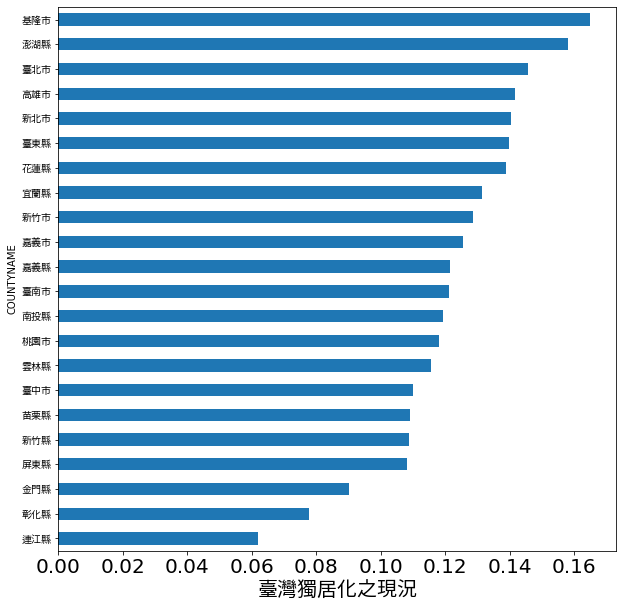

In [98]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('lonely_precent')['lonely_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況',fontproperties=myfont,fontsize=20)

## 3.高齡且獨居

Text(0.5, 1.0, '臺灣高齡獨居化之現況。')

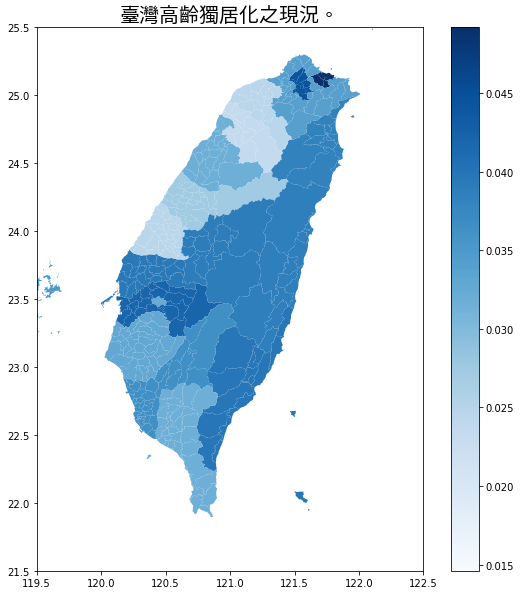

In [99]:
SA=town_A_no.plot(column='older_lonely_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡獨居化之現況。",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡獨居化之現況。')

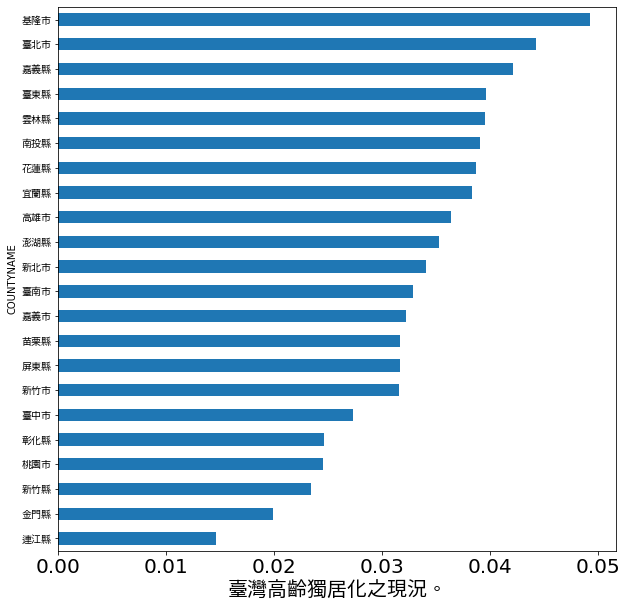

In [100]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('older_lonely_precent')['older_lonely_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡獨居化之現況。',fontproperties=myfont,fontsize=20)

# 第二題

In [50]:
data = pd.read_csv('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/moi_people_house_dtl_simulation.csv')
data.dropna(axis=0, how='any', inplace=True)
data.head()

,person_sn,household_sn,coun_cd,addr_city_cd,gender_cd,birthday_date,birth_place_cd,education_cd,marriage_cd,living_type_cd,...,is_living_same_county,having_house_type_cd,floor_group_cd,purpose_group_cd,materials_group_cd,b_area,b_age,is_in_active_fault,is_in_lique_faction,is_in_dip_slope
0,1.0,1.0,10005,10005010,1,1945-09-10,10005,2,2,0,...,1,A,99,A,A,11.540861,37.0,0,0,0
3,4.0,4.0,10005,10005010,2,1951-09-26,10005,2,2,0,...,1,A,2,A,A,110.328155,24.0,2,4,2
6,7.0,7.0,10005,10005010,2,1975-03-13,10005,3,2,0,...,1,A,2,A,A,10.435569,8.0,0,0,0
14,15.0,15.0,10005,10005010,2,1955-01-26,10005,1,2,0,...,1,A,1,F,A,193.933016,12.0,0,0,0
16,16.0,16.0,10005,10005010,2,1938-01-04,10005,1,4,0,...,1,A,1,A,B,190.568848,29.0,0,0,0


## 1.高齡

In [51]:
import time
import datetime
times = datetime.datetime.now()

In [54]:
data['old'] = data['birthday_date'].apply(lambda x: 1 if times.year - int(x[:4]) > 65 else 0 )
data['old'].sum()

125071

In [37]:
data = data.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))
town_A_no_2 = town_TA.merge(data.groupby(['TOWNNAME']).sum(), left_on=('TOWNNAME'), right_on=('TOWNNAME'))
town_A_no_2.groupby('COUNTYNAME').sum()['old'].sort_values()

COUNTYNAME
連江縣        5
金門縣      314
澎湖縣      496
臺東縣      995
新竹縣     1195
嘉義縣     1550
花蓮縣     1779
苗栗縣     2019
雲林縣     2280
南投縣     2423
宜蘭縣     2588
屏東縣     3744
嘉義市     3996
彰化縣     4752
新竹市     6153
基隆市     7285
桃園市    11570
臺南市    12612
高雄市    18986
臺北市    19268
臺中市    20408
新北市    24844
Name: old, dtype: int64

Text(0.5, 1.0, '臺灣高齡化之現況')

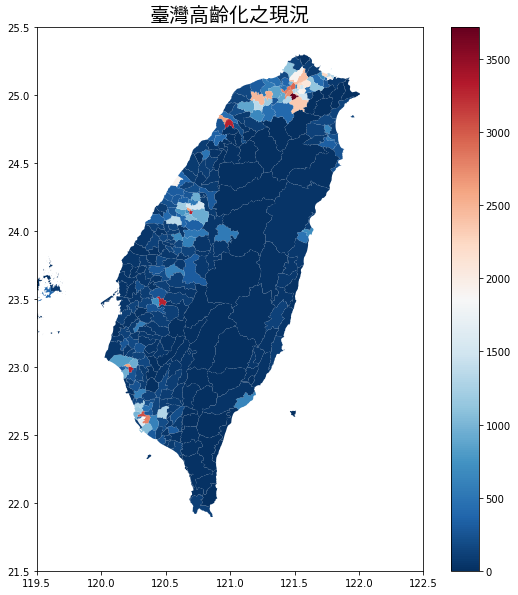

In [38]:
SA=town_A_no_2.plot(column='old',cmap='RdBu_r', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡獨居化之現況。')

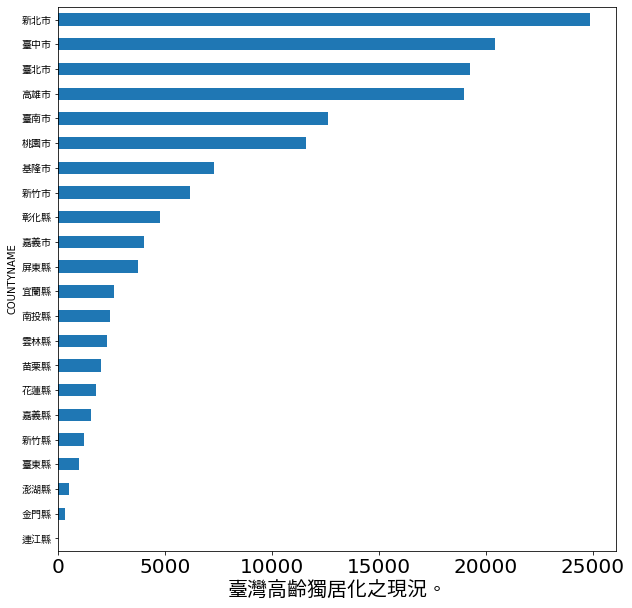

In [39]:
axes = town_A_no_2.groupby('COUNTYNAME').sum().sort_values('old')['old'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡獨居化之現況。',fontproperties=myfont,fontsize=20)